In [77]:
import numpy as np
import pandas as pd

import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

# Show all columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from collections import Counter

colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [42]:
data = pd.read_csv('./data/data.csv')

#Load the data
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [43]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [44]:
# is there any duplicate?
data.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool>

In [45]:
k=int((data.shape[1]*50)/100)
k

48

0    6599
1     220
Name: Bankrupt?, dtype: int64


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

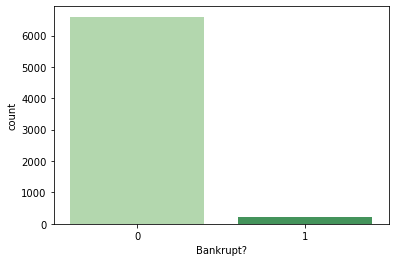

In [46]:
value = randint(0, len(colors)-1)

print(data['Bankrupt?'].value_counts())

sns.countplot('Bankrupt?',data=data,palette = colors[value])

#### The records are observed to be highly imbalanced.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [48]:
# We have observed that most of the data are continuous with type floaf64, 
# however there are some few categorical data which are
# distinguished by binary 1 and 0,


In [49]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
numeric_features
data[numeric_features].columns.tolist()

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Continuous Net 

In [50]:
categorical_features = data.dtypes[data.dtypes == 'int64'].index
categorical_features

data[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

In [51]:
# There are only 3 categorical features

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

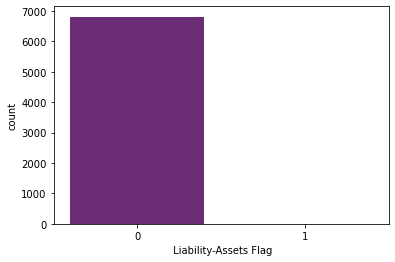

In [52]:
value = randint(0, len(colors)-1)

print(data[' Liability-Assets Flag'].value_counts())
sns.countplot(' Liability-Assets Flag',data=data,palette = colors[value])

In [53]:
# The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds 
# total assets, the flagged value will be 1, 
# else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities

 Liability-Assets Flag  Bankrupt?
0                       0            6597
                        1             214
1                       1               6
                        0               2
dtype: int64


<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

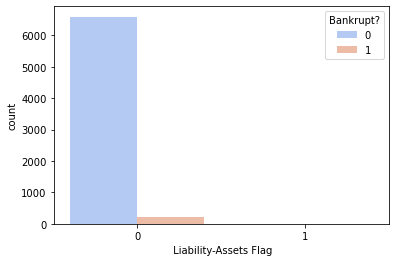

In [54]:
value = randint(0, len(colors)-1)

print(data[[' Liability-Assets Flag','Bankrupt?']].value_counts())
sns.countplot(x = ' Liability-Assets Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

In [55]:
# A small portion of businesses suffers bankruptcy, although possessing more assets than their liabilities.
# 6 companies are bankrupt  yet their assets ratio exceed their liabilities.


1    6819
Name:  Net Income Flag, dtype: int64


<AxesSubplot:xlabel=' Net Income Flag', ylabel='count'>

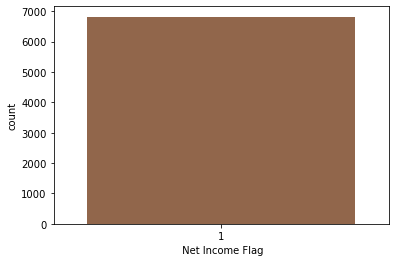

In [56]:
value = randint(0, len(colors)-1)

print(data[' Net Income Flag'].value_counts())
sns.countplot(' Net Income Flag',data=data,palette = colors[value])

In [57]:
# The "Net Income" flag denotes the status of an organization's income in the last two years, 
# where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. 
# We observe that all the records have been exhibiting a loss for the past two years.

 Net Income Flag  Bankrupt?
1                 0            6599
                  1             220
dtype: int64


<AxesSubplot:xlabel=' Net Income Flag', ylabel='count'>

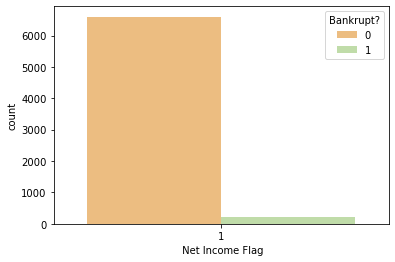

In [58]:
value = randint(0, len(colors)-1)

print(data[[' Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = ' Net Income Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

In [59]:
# Many businesses that have suffered losses for the past two years 
# have stabilized their business, thus avoiding bankruptcy.

#### For the sake of simplicity, we analyze the 8 top positively and negatively correlated attributes.

In [60]:
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:8].index.tolist()

highly_positive_corr = data[positive_corr + ["Bankrupt?"]].columns.tolist()

positive_corr = data[positive_corr + ["Bankrupt?"]].copy()

highly_positive_corr

[' Debt ratio %',
 ' Current Liability to Assets',
 ' Borrowing dependency',
 ' Current Liability to Current Assets',
 ' Liability to Equity',
 ' Current Liabilities/Equity',
 ' Current Liability to Equity',
 ' Total expense/Assets',
 'Bankrupt?']

In [61]:
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:8].index.tolist()

highly_negative_corr = data[negative_corr + ["Bankrupt?"]].columns.tolist()

negative_corr = data[negative_corr + ["Bankrupt?"]].copy()

highly_negative_corr

[' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Net worth/Assets',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Net profit before tax/Paid-in capital',
 'Bankrupt?']

In [62]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,10))
    value = randint(0, len(colors)-1)

    for i in range(1,9):
        plt.subplot(3,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])

    plt.tight_layout(pad=0.5)

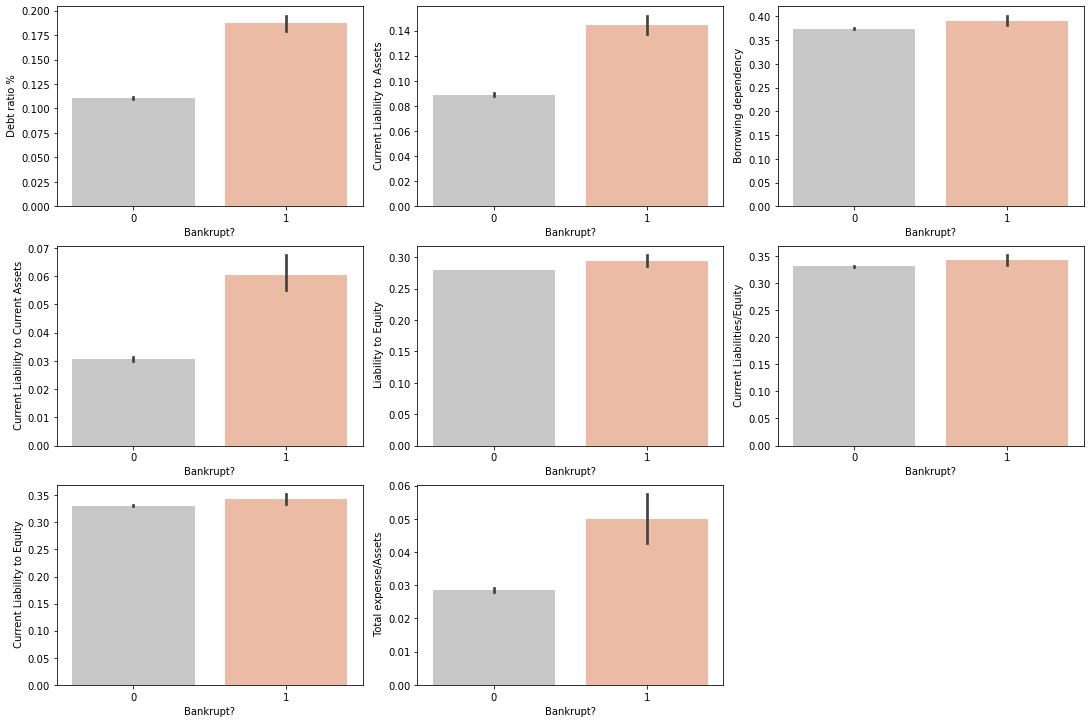

In [63]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

##### We see that 4 features - "Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets, Total expenses/Assets" are commonly high in bankrupt businesses.

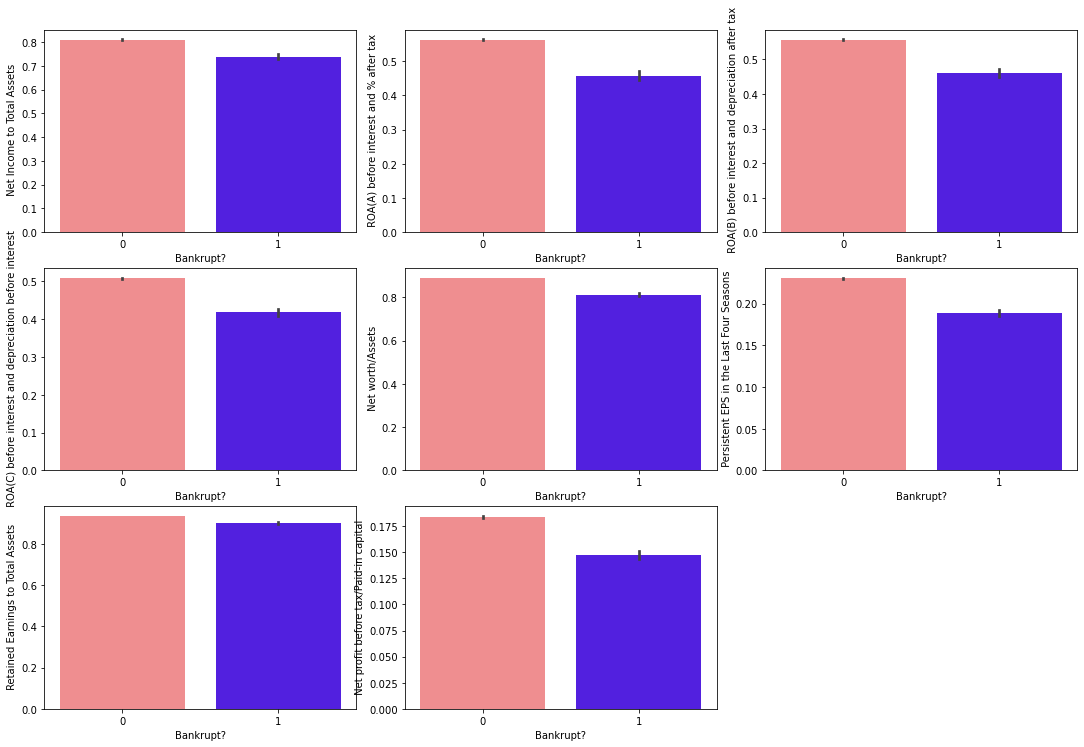

In [64]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

##### These features show us that the more the assets and earning of a company, the less likely is the organization to be bankrupt.

<AxesSubplot:>

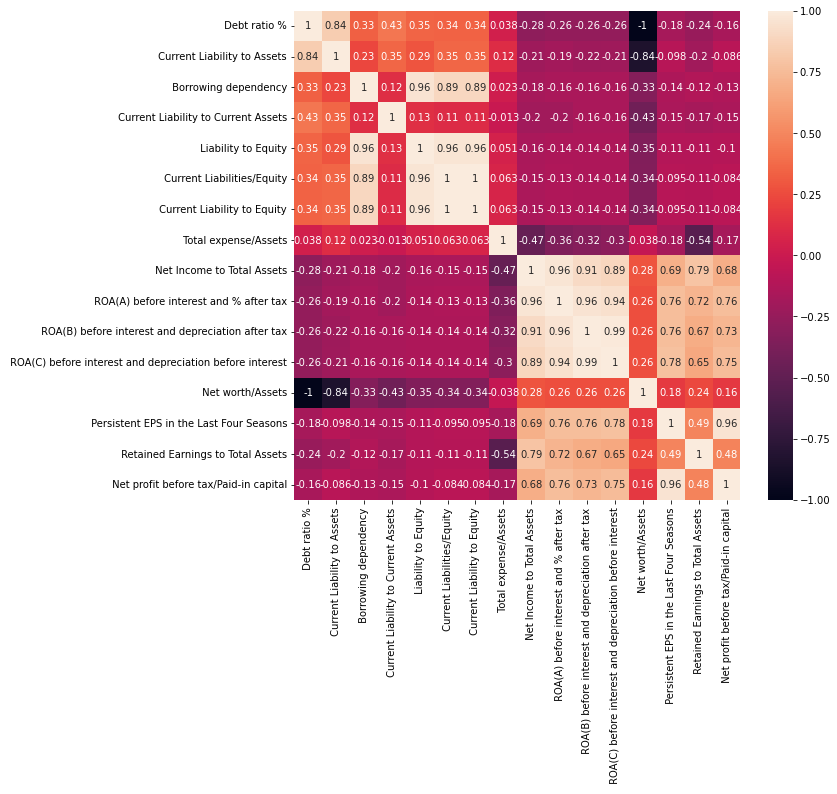

In [65]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(10,9))
sns.heatmap(data[relation].corr(),annot=True)


#### A total correlation of the top 16 features are given below

In [66]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
data[numeric_features] = data[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

data[numeric_features] = data[numeric_features].fillna(0)
data[numeric_features]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-2.217747,-2.045648,-2.400185,-0.383306,-0.382610,0.016455,-0.023514,-0.020163,-0.087472,-0.031279,-0.616288,-0.750658,-0.545216,-0.151910,-0.829327,-1.279154,-1.275135,-1.276053,-1.793974,-0.671032,-0.025696,-0.471337,-1.375049,-0.025298,0.019995,-0.012030,-0.012261,-0.010298,-0.182246,-0.01372,-0.119110,-0.769240,-0.01211,-0.034234,-0.092514,-0.026224,1.750717,-1.750717,-0.133495,0.959714,0.041862,-0.471240,-1.460388,-0.332003,-0.540305,-0.045963,-0.03833,-0.661677,-0.407093,-0.155174,-0.017023,-0.237106,-0.038219,-2.393554,-1.155748,-1.520461,-0.861757,-0.020935,-0.072813,1.126184,-0.563710,-0.045368,-0.095879,-0.412865,-1.245242,0.568445,-0.094973,-1.232503,-0.043607,1.313931,-0.175409,1.299655,-0.019618,-0.685347,0.003947,-0.01211,-0.412865,0.568445,0.558387,-0.257012,-0.108210,-1.247139,-0.206579,2.812287,-2.254152,-0.049487,-0.084268,-0.383437,-0.861548,0.680121,-0.060026,-0.098971,-0.622022
1,-0.673779,-0.311045,-0.598406,0.135058,0.136297,0.014669,0.014798,0.015965,-0.005956,0.009823,-0.616288,-0.750658,-0.326608,-0.151910,-0.829327,-0.251859,-0.250410,-0.251531,-0.597335,-0.303511,-0.025696,-0.550018,-0.435280,-0.027128,0.010034,0.039470,0.039661,-0.001930,0.207716,-0.01372,0.027845,-0.143106,-0.01211,-0.034234,0.372066,-0.026224,1.075648,-1.075648,-0.132272,0.129295,-0.010932,-0.548322,-0.446760,-0.355330,-0.762646,-0.045963,-0.03833,2.220125,-0.

The numeric attributes have been normalized.

In [67]:
Models = pd.DataFrame(columns=['Algorithm', 'Model Score', 'Precision', 'Recall', 'F1 score', 'ROC-AUC score'])
Models

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score


In [68]:
def preProcessing(df):
    df = df.copy()
    
    # Drop single-value column
    df = df.drop(' Net Income Flag', axis=1)
    
    # Split df into X and y
    y = df['Bankrupt?']
    X = df.drop('Bankrupt?', axis=1)
    
    
    # Traditional split of the dataset 80 - 20
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X, y, X_train, X_test, y_train, y_test

In [69]:
X, y, X_train, X_test, y_train, y_test = preProcessing(data)

In [70]:
X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-2.217747,-2.045648,-2.400185,-0.383306,-0.382610,0.016455,-0.023514,-0.020163,-0.087472,-0.031279,-0.616288,-0.750658,-0.545216,-0.151910,-0.829327,-1.279154,-1.275135,-1.276053,-1.793974,-0.671032,-0.025696,-0.471337,-1.375049,-0.025298,0.019995,-0.012030,-0.012261,-0.010298,-0.182246,-0.01372,-0.119110,-0.769240,-0.01211,-0.034234,-0.092514,-0.026224,1.750717,-1.750717,-0.133495,0.959714,0.041862,-0.471240,-1.460388,-0.332003,-0.540305,-0.045963,-0.03833,-0.661677,-0.407093,-0.155174,-0.017023,-0.237106,-0.038219,-2.393554,-1.155748,-1.520461,-0.861757,-0.020935,-0.072813,1.126184,-0.563710,-0.045368,-0.095879,-0.412865,-1.245242,0.568445,-0.094973,-1.232503,-0.043607,1.313931,-0.175409,1.299655,-0.019618,-0.685347,0.003947,-0.01211,-0.412865,0.568445,0.558387,-0.257012,-0.108210,-1.247139,-0.206579,2.812287,0,-2.254152,-0.049487,-0.084268,-0.383437,-0.861548,0.680121,-0.060026,-0.098971,-0.622022
1,-0.673779,-0.311045,-0.598406,0.135058,0.136297,0.014669,0.014798,0.015965,-0.005956,0.009823,-0.616288,-0.750658,-0.326608,-0.151910,-0.829327,-0.251859,-0.250410,-0.251531,-0.597335,-0.303511,-0.025696,-0.550018,-0.435280,-0.027128,0.010034,0.039470,0.039661,-0.001930,0.207716,-0.01372,0.027845,-0.143106,-0.01211,-0.034234,0.372066,-0.026224,1.075648,-1.075648,-0.132272,0.129295,-0.010932,-0.548322,-0.446760,-0.355330,-0.762646,-0.0459

In [78]:
def training_without_reduction(Parameters, Model, Dataframe, Modelname):
    data = Dataframe.copy()
    
    X, y, X_train, X_test, y_train, y_test = preProcessing(data)
    
    X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
    
    # StratifiedKFold
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    
    for train_index, test_index in sf.split(X_train, y_train):
        sf_X_train, sf_X_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]
        
    sf_X_train, sf_X_test, sf_y_train, sf_y_test = sf_X_train.values, sf_X_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters
    
    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
    
    # Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_X_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model)
        fitting_model = pipeline.fit(sf_X_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_
    
    # Evaluation with against 20% unseen testing data
    print()
    print("Evaluation of Models")
    
    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_X_train, sf_y_train)
    
    print('Resampled dataset shape %s' % Counter(ysm_train))
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)
    
    prediction = final_model_sm.predict(X_test)
    
    print(classification_report(y_test, prediction))
    
    model = {}
    
    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100), 2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction), 2)
    model['Recall'] = round(recall_score(y_test, prediction), 2)
    model['F1 score'] = round(f1_score(y_test, prediction), 2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction), 2)
    
    return model
    
    

In [81]:
print("K Nearest Neighbour")

TrainedModel = training_without_reduction({"n_neighbors": list(range(2,3,4)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data, "K Nearest Neighbour")
Models = Models.append(TrainedModel, ignore_index=True)

K Nearest Neighbour

Evaluation of Models
Resampled dataset shape Counter({1: 4183, 0: 4183})
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.68      0.94      0.79        51

    accuracy                           0.98      1364
   macro avg       0.84      0.96      0.89      1364
weighted avg       0.99      0.98      0.98      1364



In [33]:
print("Logistic Regression")
TrainedModel = training_without_reduction({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), data, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)

Logistic Regression

Evaluation of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1313
           1       0.15      0.78      0.25        51

    accuracy                           0.82      1364
   macro avg       0.57      0.80      0.57      1364
weighted avg       0.96      0.82      0.88      1364



In [34]:
print("DecisionTree Classifier")
TrainedModel = training_without_reduction({"criterion": ["gini", "entropy"], "max_depth": list(range(2,3,4)),"min_samples_leaf": list(range(5,7,1))}, DecisionTreeClassifier(), data, "DecisionTree Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

DecisionTree Classifier

Evaluation of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1313
           1       0.21      0.86      0.34        51

    accuracy                           0.88      1364
   macro avg       0.60      0.87      0.64      1364
weighted avg       0.96      0.88      0.91      1364



In [35]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
0,K Nearest Neighbour,98.09%,0.68,0.94,0.79,0.96
2,DecisionTree Classifier,87.54%,0.21,0.86,0.34,0.87
1,Logistic Regression,82.26%,0.15,0.78,0.25,0.80


Train after Reduction

In [36]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def training_with_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    # Drop single-value column
    data = data.drop(' Net Income Flag', axis=1)
    
    # Split df into X and y
    y = data['Bankrupt?']
    X = data.drop('Bankrupt?', axis=1)
    
    fs = SelectKBest(score_func=f_classif, k=int((data.shape[1]*50)/100))

    X = fs.fit_transform(X, y)
    
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    
    # Traditional split of the dataset 80 - 20
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.transform(x_train), index = x_train.index, columns = x_train.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), index = x_test.index, columns = x_test.columns)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values
    

    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)

    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [37]:
print("K Nearest Neighbour")

TrainedModel = training_with_feature_selection({"n_neighbors": list(range(2,3,4)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data, "K Nearest Neighbour")
Models = Models.append(TrainedModel, ignore_index=True)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.71      0.92      0.80        51

    accuracy                           0.98      1364
   macro avg       0.85      0.95      0.90      1364
weighted avg       0.99      0.98      0.98      1364



In [38]:
print("Logistic Regression")
TrainedModel = training_with_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), data, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)

Logistic Regression

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1313
           1       0.21      0.88      0.34        51

    accuracy                           0.87      1364
   macro avg       0.60      0.88      0.64      1364
weighted avg       0.97      0.87      0.91      1364



In [39]:
print("DecisionTree Classifier")
TrainedModel = training_with_feature_selection({"criterion": ["gini", "entropy"], "max_depth": list(range(2,3,4)),"min_samples_leaf": list(range(5,7,1))}, DecisionTreeClassifier(), data, "DecisionTree Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

DecisionTree Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1313
           1       0.20      0.86      0.33        51

    accuracy                           0.87      1364
   macro avg       0.60      0.87      0.63      1364
weighted avg       0.96      0.87      0.91      1364



In [40]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
0,K Nearest Neighbour,98.31%,0.71,0.92,0.80,0.95
1,Logistic Regression,87.32%,0.21,0.88,0.34,0.88
2,DecisionTree Classifier,86.95%,0.20,0.86,0.33,0.87
